# Cars sals

## Relevant packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the data

In [3]:
raw_data = pd.read_csv('dataset.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing
### Exploring descriptive statics of the variables

In [4]:
raw_data.describe(include='all') 
# .describe() will describe the numerical varibales only
# include = 'all' will describe both numerical and categorical data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interests
- Registration variable is useless because more than 90% of its values are yes, so is unneded
- Model variable has many dummies (312). Also, a lot of informations from ```Model```, ```Engine```, ```Year``` , ```Brand```  

In [5]:
data = raw_data.drop(['Model','Registration'],axis=1) # 1 for columns and 0 for raws
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,936,NaN,1649,NaN,NaN,2019,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,2012.000000


### Dealing with missing values

In [6]:
data.isnull()  
# true stands for missing value

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False


In [7]:
data.isnull().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

**Rule of thumb**<br>
if you removing <5% of observations, you are free to just remove all the observations with missing values.

In [8]:
data_no_mv = data.dropna(axis=0)
data_no_mv.isnull().sum()

Brand          0
Price          0
Body           0
Mileage        0
EngineV        0
Engine Type    0
Year           0
dtype: int64

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1534,NaN,NaN,1861,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,2012.000000


### Exploring PDF's

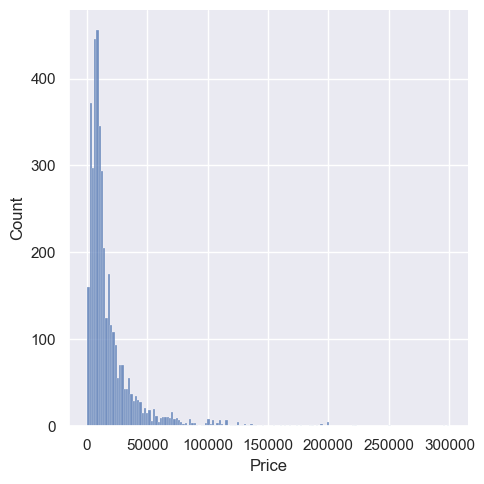

In [10]:
sns.displot(data_no_mv['Price'])

- For optimal results we would looking for ```Normal distribution```
- By simple reading on the PDF graph and describe table we found that obviously we have few outliers in the ```Price``` variable <br>
- ```Outliers``` are observations that lie on abnoraml distance from the other observations in data, they affect the regression dramaticaly and cause coefficient to be inflated
- One way to deal with this is by removing the top 1% of observations
- .quantile() will help us in this

In [11]:
q = data_no_mv['Price'].quantile(0.99) # will max give us the price of 99% of values like 75% , 50% , 25% in describe table 
q

129812.51999999981

In [12]:
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


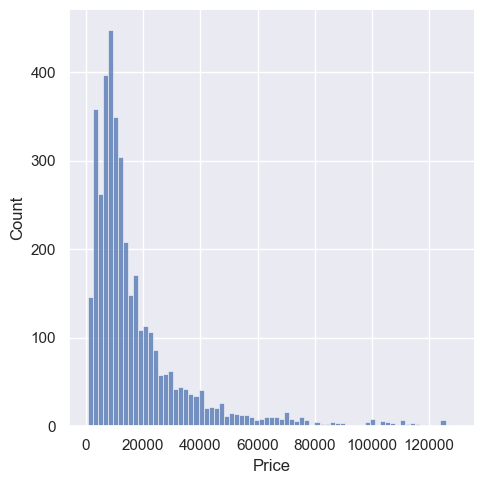

In [13]:
sns.displot(data_1['Price'])

While still far away from the mean but with less outliers, it is acceptably closer

<Axes: xlabel='Mileage', ylabel='Count'>

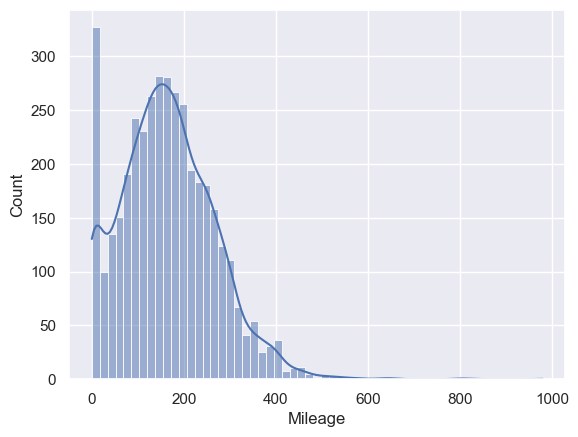

In [22]:
sns.histplot(data_1['Mileage'],kde=True)

In [27]:
q = data_1["Mileage"].quantile(0.99)
q

435.5100000000002

<Axes: xlabel='Mileage', ylabel='Count'>

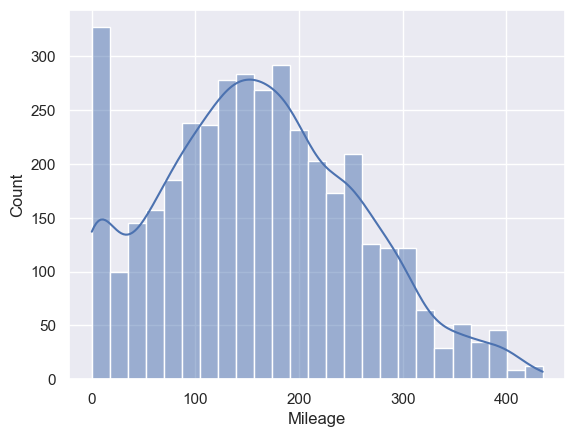

In [31]:
data_2 = data_1[data_1['Mileage']<q]
sns.histplot(data_2['Mileage'],kde=True)

<Axes: xlabel='EngineV', ylabel='Density'>

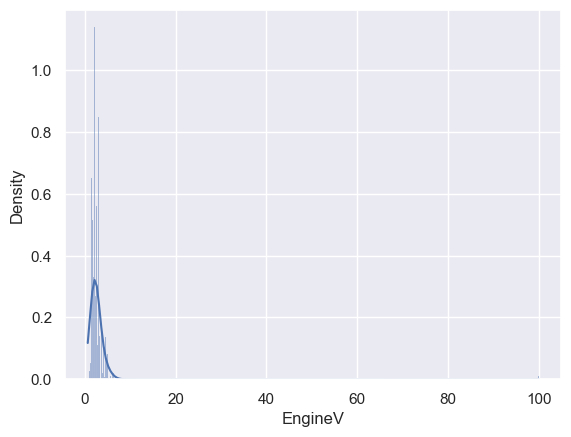

In [37]:
sns.histplot(data_2['EngineV'],kde=True,stat="density")

After quick search we found that engive volume is less then 6.5

<Axes: xlabel='EngineV', ylabel='Count'>

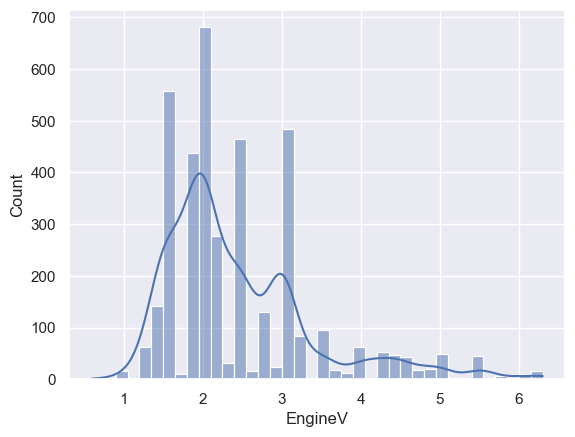

In [39]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.histplot(data_3['EngineV'],kde=True)

<Axes: xlabel='Year', ylabel='Count'>

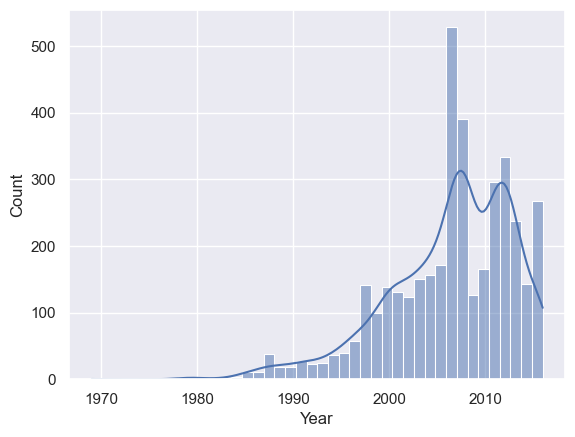

In [41]:
sns.histplot(data_3['Year'],kde=True)

In [42]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

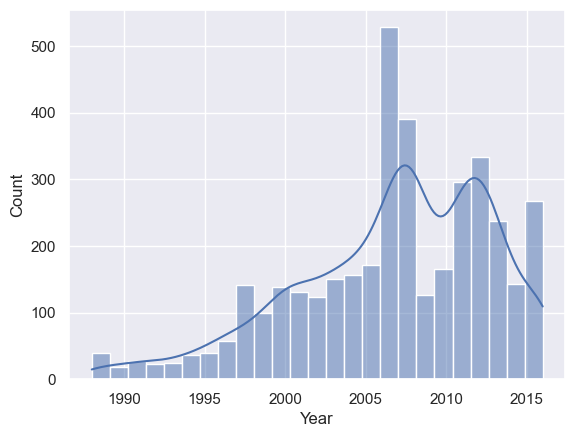

In [44]:
sns.histplot(data_4['Year'],kde=True)

In [48]:
data_cleaned = data_4
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,1999


Notice that currently indecices refer to all the data (including the removed ones), So we sould re-index the cleaned data

In [49]:
data_cleaned = data_cleaned.reset_index(drop=True)

In [50]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,1999


In [52]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1467,NaN,NaN,1807,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000
